In [1]:
import numpy as np
import pandas as pd
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# to display full text
pd.set_option('display.max_colwidth', -1)

<ipython-input-2-3b5970faf0be>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [2]:
df = pd.read_csv(r'D:\論文\PHEME9\Data\CSV\ferguson.csv', encoding = 'utf-8', header = None)

In [3]:
df.columns = ['src_tweet_id', 'src_user_id', 'src_tweet','src_date','reply_tweet_id','reply_user_id','reply_tweet','reply_date', 'label']

In [4]:
df.head()

,src_tweet_id,src_user_id,src_tweet,src_date,reply_tweet_id,reply_user_id,reply_tweet,reply_date,label
0,498235547685756928,1539100118,Black teenage boys are not men. They are child...,Sat Aug 09 22:33:06 +0000 2014,498235547685756928,1539100118,Black teenage boys are not men. They are child...,Sat Aug 09 22:33:06 +0000 2014,0
1,498235547685756928,1539100118,Black teenage boys are not men. They are child...,Sat Aug 09 22:33:06 +0000 2014,498243332204949504,587926686,@annaxsweat @NeoSoulPol Same thing when #Trayv...,Sat Aug 09 23:04:01 +0000 2014,0
2,498235547685756928,1539100118,Black teenage boys are not men. They are child...,Sat Aug 09 22:33:06 +0000 2014,498265524397432832,21461995,@annaxsweat http://t.co/Z7Qm4iaoSR,Sun Aug 10 00:32:13 +0000 2014,0
3,498235547685756928,1539100118,Black teenage boys are not men. They are child...,Sat Aug 09 22:33:06 +0000 2014,498266827676741632,21461995,@annaxsweat #StopThugCops We have to take acti...,Sun Aug 10 00:37:23 +0000 2014,0
4,498235547685756928,1539100118,Black teenage boys are not men. They are child...,Sat Aug 09 22:33:06 +0000 2014,498272808560889858,2411474370,@annaxsweat @KidFriendlyCamb 17 year olds can ...,Sun Aug 10 01:01:09 +0000 2014,0


In [5]:
df.shape

(23032, 9)

+ change data type

In [6]:
df.src_tweet_id = df.src_tweet_id.astype(str)
df.src_user_id = df.src_user_id.astype(str)

df.reply_tweet_id = df.reply_tweet_id.astype(str)
df.reply_tweet_id = df.reply_tweet_id.replace('nan',np.nan)

df.reply_user_id = df.reply_user_id.astype(str)
df.reply_user_id = df.reply_user_id.replace('nan',np.nan)

df.src_date = df.src_date.apply(pd.to_datetime)
df.reply_date = df.reply_date.apply(pd.to_datetime)

df.reply_tweet = df.reply_tweet.replace(np.nan,"")

+ Source Tweet Data: **src_tw_df**

In [6]:
#Source tweet data
src_tw_df = df.iloc[:,[0,1,2,3,8]].copy()
src_tw_df = src_tw_df.drop_duplicates().reset_index()

In [8]:
df.src_tweet_id.nunique()

1010

# EDA

## Missing Value

In [9]:
df.isnull().sum()

src_tweet_id      0
src_user_id       0
src_tweet         0
src_date          0
reply_tweet_id    0
reply_user_id     0
reply_tweet       0
reply_date        0
label             0
dtype: int64

+ drop rows where there is missing value.

In [10]:
df.dropna(inplace=True)

## Statistics

In [11]:
print("# of source tweets:",src_tw_df.src_tweet_id.nunique())
print("# of source users:",src_tw_df.src_user_id.nunique())
print("# of reply users:",df.reply_user_id.nunique())
print("# of reply tweets:",df.reply_tweet_id.nunique())

# of source tweets: 1010
# of source users: 496
# of reply users: 10738
# of reply tweets: 23032


## Visualiztion 

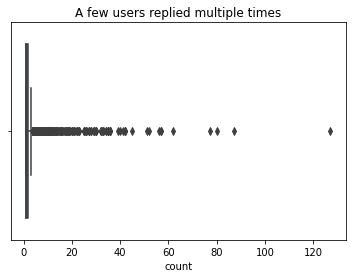

In [12]:
reply_user = df.reply_user_id.value_counts().sort_values(ascending=False).to_frame()
reply_user.rename(columns={'reply_user_id' :'count'},inplace=True)
sns.boxplot(data=reply_user ,x='count')
plt.title("A few users replied multiple times")
plt.savefig('graph/ferguson/reply_user-1.pdf',dpi=300)

In [13]:
more_freq_reply_user = reply_user.loc[reply_user['count'] > 1].index
len(more_freq_reply_user)

3336

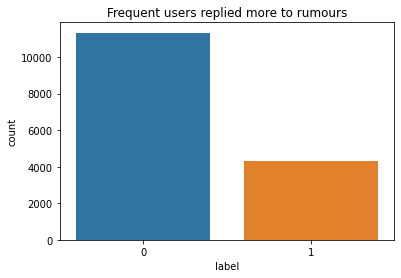

In [14]:
more_freq = df[df['reply_user_id'].isin(more_freq_reply_user)]
# more_freq.label.value_counts().
sns.countplot(data=more_freq ,x='label')
plt.title('Frequent users replied more to rumours')
plt.savefig('graph/ferguson/reply_user-2.pdf',dpi=300)

            count
14090948    92   
279390084   23   
1291770157  21   
1716581     21   
24165761    20   
...         ..   
37501003    1    
898533348   1    
65957957    1    
15951166    1    
43182702    1    

[496 rows x 1 columns]


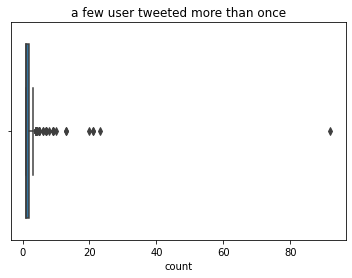

<Figure size 432x288 with 0 Axes>

In [15]:
source_user = src_tw_df.src_user_id.value_counts().sort_values(ascending=False).to_frame()
source_user.rename(columns={'src_user_id' :'count'},inplace=True)
print(source_user)
sns.boxplot(data=source_user ,x='count')
plt.title('a few user tweeted more than once',fontsize = 12)
plt.show()
plt.savefig('graph/ferguson/source_user-1.pdf',dpi=300)

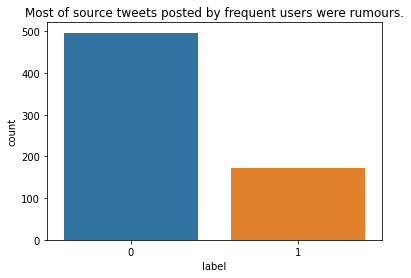

In [16]:
more_freq_src_user = source_user.loc[source_user['count'] > 1].index
more_freq_src_user
more_freq = src_tw_df[src_tw_df['src_user_id'].isin(more_freq_src_user)]
# more_freq.label.value_counts().
sns.countplot(data=more_freq ,x='label')
plt.title('Most of source tweets posted by frequent users were rumours.')
plt.savefig('graph/ferguson/src_user-2.pdf',dpi=300)

In [ ]:
df.groupby('src_tweet_id')['label'].value_counts().sort_values('label')#.plot(kind = 'bar')
# plt.title('Rumour tweet are more than non-rumor tweet',fontsize = 14)
# plt.xlabel('Rumor / Non-Rumour', fontsize=12)
# plt.ylabel('Count', fontsize=12)
# plt.show()